In [1]:
folder_name = "twoAlevs30Slevs_nonlinear_squeezed1T5"

In [2]:
seed_path = "results/" + folder_name + "/info/seedfile.txt"
print(seed_path)
with open(seed_path, "rb") as f:
        seed_value = int(f.read())

import numpy as np
np.random.seed(seed_value)

import matplotlib.pyplot as plt
%matplotlib inline

import os
import shutil

from scipy.linalg import expm, sqrtm

import GA
import physics_functions
import physics_classes
import utils

exec("from results." + folder_name + ".info.hyperparameters_physics import *")
exec("from results." + folder_name + ".info.hyperparameters_GA import *")
exec("from results." + folder_name + ".info.config import *")


if ancilla_levs==2:
        model = physics_classes.model_qubitAncillas(rho0_tuple, N_levs, Omega_S, T, linear_interaction, omegaA_range_list, grange_list, npdtype=npdtype)
elif ancilla_levs==3:
        model = physics_classes.model_3levsAncillas(rho0_tuple, N_levs, Omega_S, T, linear_interaction, omegaA_range_list, grange_list, npdtype=npdtype)

solution = np.loadtxt("results/" + folder_name +"/solution")
history = np.loadtxt("results/" + folder_name +"/history")


N_c, t_c, omegaA_list, g_I_list, rhoA_list = model.read_string(solution)
rhoS_list = model.evolve(solution)

results/twoAlevs30Slevs_nonlinear_squeezed1T5/info/seedfile.txt


Number of collisions:  73
Collision_time:  0.0684931506849315
Ancillas frequencies:  1.8151465492409744
Interaction strengths:  [np.float64(8.951999893902496e-05), np.float64(-0.5313577754449732)]
Best:  -0.057419
Required time:  5.0


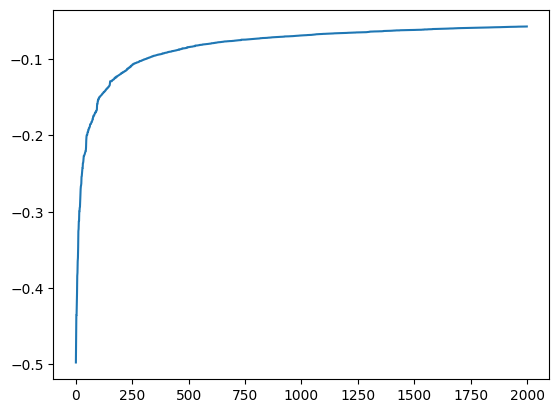

In [3]:
print("Number of collisions: ", N_c)
print("Collision_time: ", t_c)
print("Ancillas frequencies: ", omegaA_list)
print("Interaction strengths: ", g_I_list)
print("Best: ", history[-1])
print("Required time: ", N_c*t_c)
plt.plot(history)

In [8]:
#rho_target = physics_functions.init_system_state(model.H_sys, model.a, model.a_dag, target[0], target[1:])
#print(physics_functions.trace_distance(rhoS_list[-1], rho_target))
from_lev = 25
to_lev = 30
decimal = 6
print((rhoS_list[-1])[from_lev:to_lev,from_lev:to_lev].round(decimal))
#print((rho_target)[from_lev:to_lev,from_lev:to_lev].round(decimal))
#print(np.trace(rhoS_list[best_indx]))

[[ 0.-0.j -0.-0.j -0.+0.j  0.+0.j  0.-0.j]
 [-0.+0.j  0.-0.j -0.-0.j -0.+0.j  0.+0.j]
 [-0.-0.j -0.+0.j  0.-0.j -0.-0.j -0.+0.j]
 [ 0.-0.j -0.-0.j -0.+0.j  0.-0.j -0.-0.j]
 [ 0.+0.j  0.-0.j -0.-0.j -0.+0.j  0.-0.j]]


In [15]:
print(physics_functions.nongaussianity(rhoS_list[0], physics_functions.get_CovarianceMatrix(rhoS_list[0], model.a, model.a_dag)))

1.6e-05


In [ ]:
#rho00_array = np.array([rhoA_list[i][0,0].real for i in range(len(rhoA_list))])
#rho01r_array = np.array([rhoA_list[i][0,1].real for i in range(len(rhoA_list))])
#rho01c_array = np.array([rhoA_list[i][0,1].imag for i in range(len(rhoA_list))])

#plt.plot(rho00_array)

In [ ]:
#Piano simulazioni per domani
#prova squeezing 0.5 (interazione lineare e non lineare), poi vedi col tre livelli lineare e non lineare
#passa a squeezing 1 dopo (ricorda di passare a 30 livelli)
#fai anche squeeze 0.5 e displace
#intanto